In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os, sys
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az
import pytensor
import pytensor.tensor as pt
from sklearn.metrics import r2_score

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir, 'src')))
from dataloadermaker import DataLoaderMaker
import vis_utils as vu
import probabilistic_utils as pu

USE_MACOS = True 
if USE_MACOS:
    pytensor.config.cxx = ''


In [32]:
posterior_samples, df_train, df_test = pu.bayesian_inference(mcmc_draw_samples=50, mcmc_tune_samples=50,
                                                             mcmc_chains=8)

No data provided -- using default data


/Users/tplas/repos/VeluweProtoDT/Py/src/dataloadermaker.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crown["BudBurstDate"] = pd.to_datetime(crown["BudBurstDate"])
/Users/tplas/repos/VeluweProtoDT/Py/src/dataloadermaker.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crown["DOY"] = crown["BudBurstDate"].dt.dayofyear
Only 50 samples per chain. Reliable r-hat and ESS diagnostics require longer chains for accurate estimate.


Number of seasons: 36, training seasons: 30


/opt/anaconda3/envs/pymc_env/lib/python3.13/site-packages/pytensor/tensor/rewriting/elemwise.py:1011: UserWarning: Loop fusion failed because the resulting node would exceed the kernel argument limit.
  warn(
/opt/anaconda3/envs/pymc_env/lib/python3.13/site-packages/pytensor/tensor/rewriting/elemwise.py:1011: UserWarning: Loop fusion failed because the resulting node would exceed the kernel argument limit.
  warn(
/opt/anaconda3/envs/pymc_env/lib/python3.13/site-packages/pytensor/tensor/rewriting/elemwise.py:1011: UserWarning: Loop fusion failed because the resulting node would exceed the kernel argument limit.
  warn(
/opt/anaconda3/envs/pymc_env/lib/python3.13/site-packages/pytensor/tensor/rewriting/elemwise.py:1011: UserWarning: Loop fusion failed because the resulting node would exceed the kernel argument limit.
  warn(
/opt/anaconda3/envs/pymc_env/lib/python3.13/site-packages/pytensor/tensor/rewriting/elemwise.py:1011: UserWarning: Loop fusion failed because the resulting node wou

Output()

/opt/anaconda3/envs/pymc_env/lib/python3.13/site-packages/pytensor/scalar/basic.py:3191: RuntimeWarning: overflow encountered in exp
  return np.exp(x)
/opt/anaconda3/envs/pymc_env/lib/python3.13/site-packages/pytensor/scalar/basic.py:3191: RuntimeWarning: overflow encountered in exp
  return np.exp(x)
/opt/anaconda3/envs/pymc_env/lib/python3.13/site-packages/pytensor/scalar/basic.py:3191: RuntimeWarning: overflow encountered in exp
  return np.exp(x)
/opt/anaconda3/envs/pymc_env/lib/python3.13/site-packages/pytensor/scalar/basic.py:3191: RuntimeWarning: overflow encountered in exp
  return np.exp(x)
/opt/anaconda3/envs/pymc_env/lib/python3.13/site-packages/pytensor/scalar/basic.py:3191: RuntimeWarning: overflow encountered in exp
  return np.exp(x)
/opt/anaconda3/envs/pymc_env/lib/python3.13/site-packages/pytensor/scalar/basic.py:3191: RuntimeWarning: overflow encountered in exp
  return np.exp(x)
/opt/anaconda3/envs/pymc_env/lib/python3.13/site-packages/pytensor/scalar/basic.py:3191:

/opt/anaconda3/envs/pymc_env/lib/python3.13/site-packages/pymc/step_methods/metropolis.py:320: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
/opt/anaconda3/envs/pymc_env/lib/python3.13/site-packages/pymc/step_methods/metropolis.py:320: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
/opt/anaconda3/envs/pymc_env/lib/python3.13/site-packages/pymc/step_methods/metropolis.py:320: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
/opt/anaconda3/envs/pymc_env/lib/python3.13/site-packages/pymc/step_methods/metropolis.py:320: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
/opt/anaconda3/envs/pymc_env/lib/python3.13/site-packages/pymc/step_methods/metropolis.py:320: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
/opt/anaconda3/envs/pymc_env/lib/python3.13/s

Sampling 8 chains for 50 tune and 50 draw iterations (400 + 400 draws total) took 536 seconds.
There were 49 divergences after tuning. Increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 4 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
The number of samples is too small to check convergence reliably.


In [33]:
posterior_samples

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

# Option 1 (not great): compute deterministic fit
Use a single estimate of parameter values (MAP, mean, etc.) to compute a single prediction of test data and fit:

R² on test set: -0.086


Text(0, 0.5, 'Predicted BB CDF')

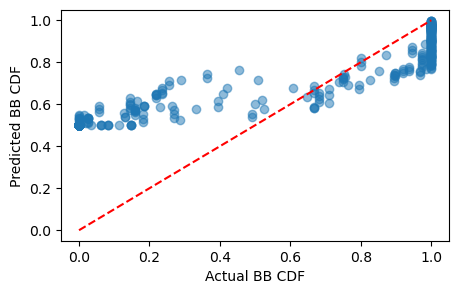

In [35]:
df_use = df_test 

# Get posterior samples
posterior = az.extract(posterior_samples)

method_estimate = 'mean'
match method_estimate:
    case 'mean':
        t_base_post = float(posterior["t_base"].mean().values)  # or az.map_estimate(posterior_samples)["t_base"]
        start_doy_post = float(posterior["start_date"].mean().values)  # or MAP estimate
    case 'median':
        t_base_post = float(posterior["t_base"].median().values)  # or az.map_estimate(posterior_samples)["t_base"]
        start_doy_post = float(posterior["start_date"].median().values)  # or MAP estimate
    # case 'MAP':
        # t_base_post = az.map_estimate(posterior_samples)["t_base"]
        # start_doy_post = az.map_estimate(posterior_samples)["start_date"]

# Compute GDD for test data
temperature_test = df_use["temperature"].values
t_above_base_test = np.maximum(0, temperature_test - t_base_post)

gdd_test = np.zeros_like(t_above_base_test)
for s in df_use["season"].unique():
    inds_s = df_use["season"] == s
    inds_s = inds_s.values

    doy_s = df_use["doy"][inds_s].values
    gdd_s = t_above_base_test[inds_s]
    gdd_s[doy_s < start_doy_post] = 0
    gdd_s = np.cumsum(gdd_s)
    gdd_test[inds_s] = gdd_s

# α_post = float(posterior["α"].mean().values)  # or MAP estimate
β_post = float(posterior["β"].mean().values)  # or MAP estimate
mu_test = 1 / (1 + np.exp(-(β_post * gdd_test)))  # Sigmoid function

df_use["predicted_bb_cdf"] = mu_test
r2 = r2_score(df_use["bb_cdf"], df_use["predicted_bb_cdf"])
print(f"R² on test set: {r2:.3f}")

# Plot predictions vs actual values
plt.figure(figsize=(5, 3))
plt.scatter(df_use["bb_cdf"], df_use["predicted_bb_cdf"], alpha=0.5)
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.xlabel("Actual BB CDF") 
plt.ylabel("Predicted BB CDF")

# Option 2 (great): use posterior distribution
Use posterior distribution of parameters for a probabilistic fit (to compute c.i. etc.)

In [37]:
posterior

<xarray.Dataset> Size: 15MB
Dimensions:     (sample: 400, mu_dim_0: 4538)
Coordinates:
  * mu_dim_0    (mu_dim_0) int64 36kB 0 1 2 3 4 5 ... 4533 4534 4535 4536 4537
  * sample      (sample) object 3kB MultiIndex
  * chain       (sample) int64 3kB 0 0 0 0 0 0 0 0 0 0 0 ... 7 7 7 7 7 7 7 7 7 7
  * draw        (sample) int64 3kB 0 1 2 3 4 5 6 7 8 ... 42 43 44 45 46 47 48 49
Data variables:
    t_base      (sample) float64 3kB 4.995 4.996 4.995 ... 7.815 7.94 7.947
    start_date  (sample) int64 3kB 100 100 100 100 100 ... 100 100 100 100 100
    β           (sample) float64 3kB 0.007031 0.008164 ... 0.01762 0.01536
    σ           (sample) float64 3kB 0.5206 0.5187 0.5173 ... 0.4353 0.4342
    mu          (mu_dim_0, sample) float64 15MB 0.5 0.5 0.5 ... 0.9831 0.9717
Attributes:
    created_at:                 2025-04-14T15:56:08.770227+00:00
    arviz_version:              0.21.0
    inference_library:          pymc
    inference_library_version:  5.22.0
    sampling_time:              536.1640799045563
    tuning_steps:               50

<Axes: xlabel='start_date', ylabel='t_base'>

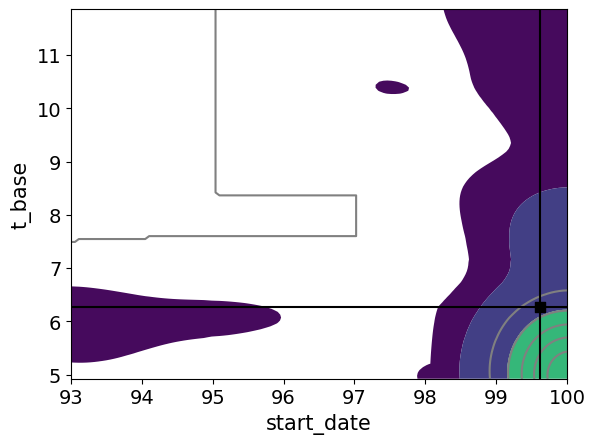

In [40]:
## Plot posterior distribution:

# az.plot_posterior_samples(posterior_samples, var_names=["α"])
# az.plot_forest(posterior_samples, var_names=["t_base", "start_date", "α", "β", "σ"], combined=True)
az.plot_pair(posterior_samples, var_names=["start_date", "t_base"], kind="kde", point_estimate="mean")

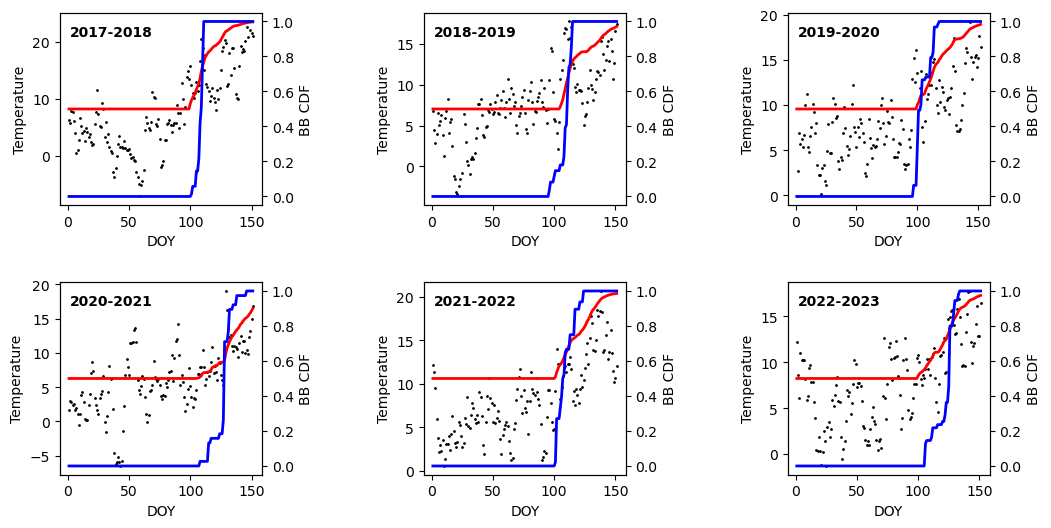

In [41]:

seasons = df_use['season'].unique()
n_seasons = len(seasons)
fig, ax = plt.subplots(figsize=(12, n_seasons // 3 * 3), nrows=n_seasons // 3, ncols=3, gridspec_kw={"hspace": 0.4, "wspace": 0.8})

for i_s, s in enumerate(seasons):
    tmp_sel = df_use[df_use['season'] == s]
    curr_ax = np.ravel(ax)[i_s]

    curr_ax.plot(tmp_sel.doy, tmp_sel.temperature, '.', c='k', markersize=2)

    ax2 = curr_ax.twinx()
    ax2.plot(tmp_sel.doy, tmp_sel.predicted_bb_cdf, 'r-', lw=2)
    ax2.plot(tmp_sel.doy, tmp_sel.bb_cdf, 'b-', lw=2)
    curr_ax.annotate(s, xy=(0.05, 0.9), xycoords='axes fraction', ha='left', va='center', weight='bold')
    curr_ax.set_xlabel("DOY")
    curr_ax.set_ylabel("Temperature")
    ax2.set_ylabel("BB CDF")

Text(0.5, 0.98, 'Evaluation of the model on test data')

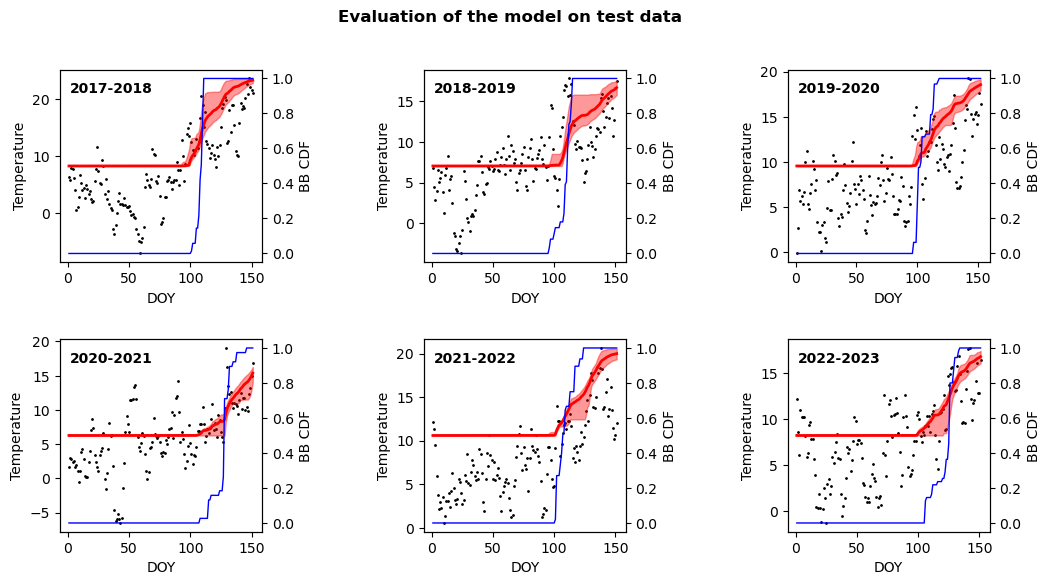

In [ ]:
df_use = df_test

# Extract posterior samples (e.g., 1000 samples)
n_samples = len(posterior["t_base"])  # Number of posterior samples
temperature_test = df_use["temperature"].values
n_test = len(temperature_test)  # Number of test observations

# Initialize array to store GDD predictions (n_samples x n_test)
gdd_samples = np.zeros((n_samples, n_test))
for i in range(n_samples):
    t_base_sample = float(posterior["t_base"][i].values)
    start_doy_sample = float(posterior["start_date"][i].values)

    t_above_base_test = np.maximum(0, temperature_test - t_base_sample)

    gdd_test = np.zeros_like(t_above_base_test)
    for s in df_use["season"].unique():
        inds_s = df_use["season"] == s
        inds_s = inds_s.values

        doy_s = df_use["doy"][inds_s].values
        gdd_s = t_above_base_test[inds_s]
        gdd_s[doy_s < start_doy_sample] = 0  # Set GDD to 0 before start date
        gdd_s = np.cumsum(gdd_s)  # Compute cumulative sum
        gdd_test[inds_s] = gdd_s

    gdd_samples[i, :] = gdd_test  # Store sample-specific GDD

# Initialize array for predictions (n_samples x n_test)
bb_cdf_samples = np.zeros((n_samples, n_test))
for i in range(n_samples):
    # α_sample = float(posterior_samples["α"][i].values)
    β_sample = float(posterior["β"][i].values)
    
    # Logistic function: maps GDD to cumulative fraction
    bb_cdf_samples[i, :] = 1 / (1 + np.exp(-( β_sample * gdd_samples[i, :])))
    # bb_cdf_samples[i, :] = 1 / (1 + np.exp(-(α_sample + β_sample * gdd_samples[i, :])))

bb_cdf_mean = np.mean(bb_cdf_samples, axis=0)  # Mean prediction
bb_cdf_lower = np.percentile(bb_cdf_samples, 0.5, axis=0)  # 2.5th percentile (lower CI)
bb_cdf_upper = np.percentile(bb_cdf_samples, 99.5, axis=0)  # 97.5th percentile (upper CI)

df_use["predicted_bb_cdf"] = bb_cdf_mean
df_use["bb_cdf_lower"] = bb_cdf_lower
df_use["bb_cdf_upper"] = bb_cdf_upper


# Plot predictions with uncertainty (shaded area)
fig, ax = plt.subplots(figsize=(12, 6), nrows=2, ncols=3, gridspec_kw={"hspace": 0.4, "wspace": 0.8})

for i_s, s in enumerate(df_use['season'].unique()):
    tmp_sel = df_use[df_use['season'] == s]
    curr_ax = np.ravel(ax)[i_s]

    curr_ax.plot(tmp_sel.doy, tmp_sel.temperature, '.', c='k', markersize=2)

    ax2 = curr_ax.twinx()
    ax2.plot(tmp_sel.doy, tmp_sel.predicted_bb_cdf, 'r-', lw=2)
    ax2.plot(tmp_sel.doy, tmp_sel.bb_cdf, 'b-', lw=1)
    ## uncertainty:
    ax2.fill_between(x=tmp_sel.doy, y1=tmp_sel.bb_cdf_lower, y2=tmp_sel.bb_cdf_upper, color='red', alpha=0.4)


    curr_ax.annotate(s, xy=(0.05, 0.9), xycoords='axes fraction', ha='left', va='center', weight='bold')
    curr_ax.set_xlabel("DOY")
    curr_ax.set_ylabel("Temperature")
    ax2.set_ylabel("BB CDF")

fig.suptitle('Evaluation of the model on test data', weight='bold')